In [89]:
import pandas as pd
import random

# Define primary categories with multiple variations
categories = {
    "Groceries": [
        "Bought vegetables from local store", "Supermarket checkout", 
        "Organic food order", "Weekend grocery shopping", "Picked up groceries"
    ],
    "Entertainment": [
        "Netflix subscription", "Movie outing with friends", "Bought a new game", 
        "Streaming service payment", "Concert ticket purchase"
    ],
    "Rent": [
        "Paid monthly house rent", "Apartment lease payment", 
        "House rental fee", "Monthly rent transfer"
    ],
    "Utilities": [
        "Electricity bill payment", "Gas connection refill", "Paid broadband bill", 
        "Water bill clearance", "Mobile postpaid bill"
    ],
    "Dining": [
        "Dinner at a restaurant", "Ordered pizza online", "Fast food takeaway", 
        "Lunch at a café", "Coffee at Starbucks"
    ],
    "Transport": [
        "Uber ride to office", "Train ticket booking", "Gas station refill", 
        "Monthly subway pass", "Airport taxi ride","Gas station fuel refill",
        "Petrol pump transaction", "Diesel purchase","Flight ticket booking","Bus ticket booking"
    ],
    "Shopping": [
        "Purchased new shoes", "Amazon order for electronics", "Bought clothes online", 
        "Shopping trip to the mall", "Bought a new watch"
    ],
    "Insurance": [
        "Health insurance premium", "Car insurance renewal", "Travel insurance payment", 
        "Life insurance premium", "Home insurance payment"
    ],
}

# Define ambiguous categories (transactions that could belong to multiple categories)
ambiguous_categories = {
    "Grocery or Dining": [
        "Pizza delivery", "Bought snacks from a store", "Purchased beverages", "Bakery purchase"
    ],
    "Entertainment or Shopping": [
        "Bought a gaming console", "Streaming device order", "Concert merchandise", 
        "Online music store purchase"
    ],
    "Transport or Shopping": [
        "Bought a new bicycle", "Uber monthly subscription", "Purchased car accessories", 
        "New backpack for travel"
    ],
    "Health or Fitness": [
        "Gym membership renewal", "Bought protein supplements", "Purchased yoga mat", 
        "Fitness equipment order"
    ],
    "Rent or Utilities": [
        "Electricity bill with rent", "Water bill with rent", "Gas connection with rent"
        ],
    
}

# Generate dataset
data = []
total_entries = 300000  # Increase dataset size

for _ in range(total_entries):
    if random.random() < 0.2:  # 20% ambiguous transactions
        category = random.choice(list(ambiguous_categories.keys()))
        description = random.choice(ambiguous_categories[category])
    else:
        category = random.choice(list(categories.keys()))
        description = random.choice(categories[category])
    
    # Generate random transaction amount between $5 and $1000
    amount = round(random.uniform(5, 1000), 2)
    data.append([description, amount, category])

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data, columns=["Description", "Amount", "Category"])
df.to_csv("synthetic_expenses.csv", index=False)

print("✅ Enhanced dataset with ambiguous transactions generated!")


✅ Enhanced dataset with ambiguous transactions generated!


In [1]:
import pandas as pd
import random

# Define primary categories with multiple variations
categories = {
    "Groceries": [
        "Bought fresh vegetables from a supermarket", "Local store grocery shopping", 
        "Organic food delivery", "Weekend supermarket haul", "Picked up groceries"
    ],
    "Entertainment": [
        "Paid for Netflix subscription", "Went to a movie with friends", 
        "Purchased a new video game", "Monthly streaming service payment", "Concert tickets booked"
    ],
    "Rent": [
        "Transferred monthly house rent", "Apartment lease payment made", 
        "Paid house rental fee", "Completed monthly rent transaction"
    ],
    "Utilities": [
        "Paid electricity bill online", "Refilled gas connection", 
        "Broadband bill payment done", "Cleared water bill", "Settled mobile phone bill"
    ],
    "Dining": [
        "Dined out at an Italian restaurant", "Ordered pizza from Domino's", 
        "Takeaway from McDonald's", "Lunch at a new café", "Bought coffee at Starbucks"
    ],
    "Transport": [
        "Took an Uber to work", "Booked a train ticket", "Refilled gas at station", 
        "Monthly subway pass renewal", "Paid for airport taxi","Refueled at petrol pump",
        "Diesel purchase made","Flight ticket reservation","Booked a bus ticket"
    ],
    "Shopping": [
        "Bought new sneakers online", "Amazon order for gadgets", 
        "Purchased clothes from an online store", "Shopping spree at the mall", "New watch purchase"
    ],
    "Insurance": [
        "Paid health insurance premium", "Renewed car insurance", "Paid for travel insurance", 
        "Life insurance installment", "Home insurance policy payment"
    ],
}

# Ambiguous transactions: Assign them randomly to one of the possible categories
ambiguous_categories = {
    "Groceries or Dining": ["Pizza delivery order", "Bought snacks from a convenience store", 
                             "Purchased beverages from a supermarket", "Bakery purchase"],
    "Entertainment or Shopping": ["Bought a PlayStation", "Ordered a streaming device", 
                                  "Merchandise from concert", "Digital music store purchase"],
    "Transport or Shopping": ["New bicycle purchase", "Monthly Uber subscription", 
                              "Bought car accessories", "Bought a backpack for travel"],
    "Health or Fitness": ["Renewed gym membership", "Bought protein supplements", 
                          "Yoga mat purchase", "Ordered fitness equipment"],
    "Rent or Utilities": ["Paid electricity along with rent", "Included water bill with rent", 
                          "Gas bill covered with monthly rent"]
}

# Generate dataset
data = []
total_entries = 5000  # Increased dataset size for better generalization

for _ in range(total_entries):
    if random.random() < 0.25:  # 25% ambiguous transactions
        ambiguous_category = random.choice(list(ambiguous_categories.keys()))
        description = random.choice(ambiguous_categories[ambiguous_category])
        category = random.choice(ambiguous_category.split(" or "))  # Assign to ONE category
    else:
        category = random.choice(list(categories.keys()))
        description = random.choice(categories[category])
    
    # Introduce random variations in text (basic augmentation)
    if random.random() < 0.15:  # 15% chance of adding variation
        description = description.lower() if random.random() < 0.5 else description.upper()
        if random.random() < 0.3:
            description = description.replace(" ", "  ")  # Extra spaces
        if random.random() < 0.2:
            description += "."  # Add punctuation variation
    
    # Generate random transaction amount between $5 and $1000
    amount = round(random.uniform(5, 1000), 2)
    data.append([description, amount, category])

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data, columns=["Description", "Amount", "Category"])
df.to_csv("synthetic_expenses.csv", index=False)

print("✅ Enhanced dataset with more realistic and diverse transactions generated!")

✅ Enhanced dataset with more realistic and diverse transactions generated!


In [2]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load new dataset
df = pd.read_csv("synthetic_expenses.csv")

# Handle missing or empty descriptions
df = df.dropna(subset=["Description"])
df = df[df["Description"].str.strip() != ""]

# Extract features (X) and labels (y)
X = df["Description"]
y = df["Category"]

# Split data into training (80%) and testing (20%) sets FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now apply TF-IDF separately to training and test sets
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english", max_features=1000)

# Fit on training data and transform both sets
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Save vectorizer for later reuse
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Data preprocessing complete with the new dataset!")
print(f"Training data shape: {X_train_transformed.shape}")
print(f"Testing data shape: {X_test_transformed.shape}")
print("✅ TF-IDF vectorizer saved as 'vectorizer.pkl'")


✅ Data preprocessing complete with the new dataset!
Training data shape: (4000, 251)
Testing data shape: (1000, 251)
✅ TF-IDF vectorizer saved as 'vectorizer.pkl'


In [7]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load new dataset
df = pd.read_csv("synthetic_expenses.csv")

# Handle missing or empty descriptions
df = df.dropna(subset=["Description"])
df = df[df["Description"].str.strip() != ""]

# Extract features (X) and labels (y)
X = df["Description"]
y = df["Category"]

# Split data into training (80%) and testing (20%) sets FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-saved vectorizer instead of fitting a new one
vectorizer = joblib.load("vectorizer.pkl")

# Transform both sets using the already saved vectorizer
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train Naïve Bayes with higher alpha (forces uncertainty)
model = MultinomialNB(alpha=0.01)

# Fit the model
model.fit(X_train_transformed, y_train)

# Predict on test set
y_pred = model.predict(X_test_transformed)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Updated Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(model, "expense_classifier.pkl")
print("✅ Model saved successfully!")


✅ Updated Model Accuracy: 0.8470

Classification Report:
               precision    recall  f1-score   support

       Dining       0.93      0.73      0.81       106
Entertainment       0.90      0.91      0.90       106
      Fitness       0.57      0.34      0.43        38
    Groceries       0.82      0.96      0.88       134
       Health       0.32      0.55      0.41        22
    Insurance       1.00      1.00      1.00       100
         Rent       0.90      0.85      0.88       107
     Shopping       0.88      0.72      0.79       152
    Transport       0.78      0.96      0.86       118
    Utilities       0.87      0.91      0.89       117

     accuracy                           0.85      1000
    macro avg       0.80      0.79      0.79      1000
 weighted avg       0.86      0.85      0.85      1000

✅ Model saved successfully!


In [4]:
import joblib

# Load saved model and vectorizer
model = joblib.load("expense_classifier.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Define edge cases for testing
edge_cases = [
    "Bought snacks from a vending machine",
    "Paid phone bill",
    "Online shopping for clothes",
    "Booked flight tickets",
    "Bought new laptop from Amazon",
    "Gas refill at Shell",
    "Netflix subscription renewal",
    "Dinner at McDonald's",
    "Monthly gym membership",
    "Car insurance payment"
]

# Transform test cases using the saved vectorizer
edge_cases_transformed = vectorizer.transform(edge_cases)

# Predict categories
edge_predictions = model.predict(edge_cases_transformed)

# Display results
for expense, category in zip(edge_cases, edge_predictions):
    print(f"{expense} ➝ {category}")


Bought snacks from a vending machine ➝ Groceries
Paid phone bill ➝ Utilities
Online shopping for clothes ➝ Shopping
Booked flight tickets ➝ Entertainment
Bought new laptop from Amazon ➝ Shopping
Gas refill at Shell ➝ Utilities
Netflix subscription renewal ➝ Entertainment
Dinner at McDonald's ➝ Dining
Monthly gym membership ➝ Fitness
Car insurance payment ➝ Insurance


In [8]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Load pre-saved vectorizer and transform training data
vectorizer = joblib.load("vectorizer.pkl")  # Load the saved vectorizer
X_train_transformed = vectorizer.transform(X_train)  # Transform, don't re-fit

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 5.0, 10.0]  # Different smoothing levels
}

# Initialize model
nb_model = MultinomialNB()

# Perform Grid Search
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_transformed, y_train)

# Best parameters
print(f"✅ Best alpha: {grid_search.best_params_['alpha']}")
print(f"✅ Best accuracy: {grid_search.best_score_:.4f}")

# Train model with best parameters
best_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_model.fit(X_train_transformed, y_train)

# Save the best model
joblib.dump(best_model, "expense_classifier_best.pkl")
print("✅ Best model saved as 'expense_classifier_best.pkl'")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best alpha: 0.01
✅ Best accuracy: 0.8717
✅ Best model saved as 'expense_classifier_best.pkl'


✅ Classification Report:

               precision    recall  f1-score   support

       Dining       0.93      0.73      0.81       106
Entertainment       0.90      0.91      0.90       106
      Fitness       0.57      0.34      0.43        38
    Groceries       0.82      0.96      0.88       134
       Health       0.32      0.55      0.41        22
    Insurance       1.00      1.00      1.00       100
         Rent       0.90      0.85      0.88       107
     Shopping       0.88      0.72      0.79       152
    Transport       0.78      0.96      0.86       118
    Utilities       0.87      0.91      0.89       117

     accuracy                           0.85      1000
    macro avg       0.80      0.79      0.79      1000
 weighted avg       0.86      0.85      0.85      1000



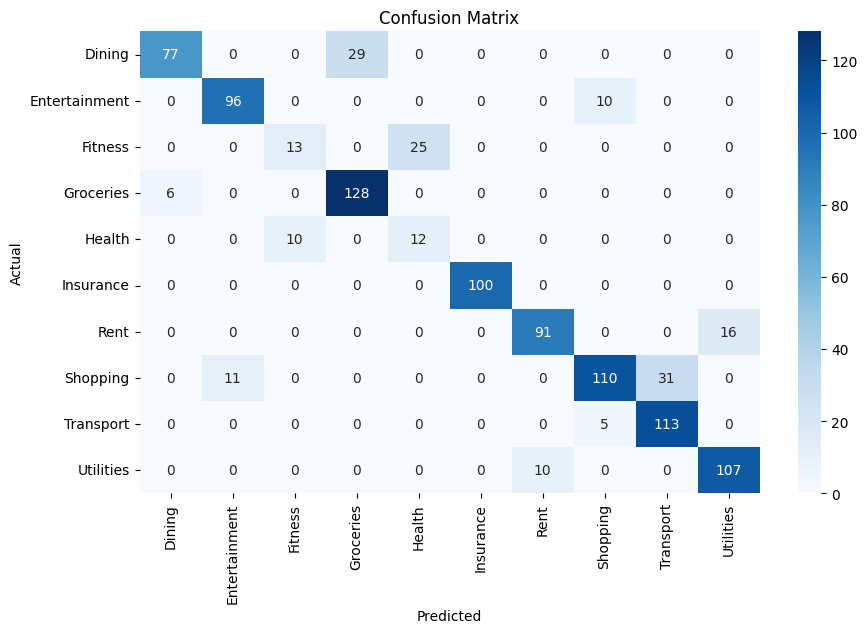

In [9]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model and vectorizer
best_model = joblib.load("expense_classifier_best.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Transform test data
X_test_transformed = vectorizer.transform(X_test)

# Predict on test set
y_pred = best_model.predict(X_test_transformed)

# Classification report
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# Ensure confusion matrix labels match all unique categories in test set
labels = sorted(set(y_test) | set(y_pred))  # Ensure all categories are included

# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=labels), annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
import numpy as np
import pandas as pd
from collections import Counter

# Ensure X_test is a Pandas Series
X_test = pd.Series(X_test)

# Find incorrect predictions
misclassified_indices = np.where(y_test != y_pred)[0]  # Get indices where predictions are wrong

if len(misclassified_indices) == 0:
    print("🎯 No misclassifications found! The model might be overfitting.")
else:
    print(f"⚠️ {len(misclassified_indices)} misclassified transactions found.")
    
    # Print first 10 misclassified samples
    for idx in misclassified_indices[:10]:
        print(f"❌ '{X_test.iloc[idx]}' → True: {y_test.iloc[idx]}, Predicted: {y_pred[idx]}")

    # Count misclassifications per category
    misclassified_labels = y_test.iloc[misclassified_indices].tolist()
    misclassified_counts = Counter(misclassified_labels)
    print("\n🔍 Top Misclassified Categories:", misclassified_counts.most_common(5))

    # Find most common misclassification errors
    common_errors = Counter((y_test.iloc[idx], y_pred[idx]) for idx in misclassified_indices)
    print("\n🔴 Most Common Misclassifications:\n", common_errors.most_common(5))


⚠️ 153 misclassified transactions found.
❌ 'Bought snacks from a convenience store' → True: Dining, Predicted: Groceries
❌ 'Bought a PlayStation' → True: Entertainment, Predicted: Shopping
❌ 'BOUGHT SNACKS FROM A CONVENIENCE STORE' → True: Dining, Predicted: Groceries
❌ 'Bought car accessories' → True: Shopping, Predicted: Transport
❌ 'Paid electricity along with rent' → True: Rent, Predicted: Utilities
❌ 'Bakery purchase' → True: Dining, Predicted: Groceries
❌ 'Included water bill with rent' → True: Rent, Predicted: Utilities
❌ 'Yoga mat purchase' → True: Fitness, Predicted: Health
❌ 'Bought a backpack for travel' → True: Shopping, Predicted: Transport
❌ 'Paid electricity along with rent' → True: Rent, Predicted: Utilities

🔍 Top Misclassified Categories: [('Shopping', 42), ('Dining', 29), ('Fitness', 25), ('Rent', 16), ('Entertainment', 10)]

🔴 Most Common Misclassifications:
 [(('Shopping', 'Transport'), 31), (('Dining', 'Groceries'), 29), (('Fitness', 'Health'), 25), (('Rent', 'Uti

In [13]:
import joblib
import os

def classify_expenses(expense_list):
    """Loads the saved model and vectorizer, then predicts categories for new expenses."""
    
    try:
        # Check if model and vectorizer exist
        if not os.path.exists("expense_classifier.pkl") or not os.path.exists("vectorizer.pkl"):
            raise FileNotFoundError("❌ Model or vectorizer file is missing! Train the model first.")

        # Load the saved model and vectorizer
        model = joblib.load("expense_classifier.pkl")
        vectorizer = joblib.load("vectorizer.pkl")

        # Handle empty input list
        if not expense_list:
            print("⚠️ No expenses provided for classification.")
            return {}

        # Transform the input expenses
        transformed_expenses = vectorizer.transform(expense_list)

        # Predict categories
        predictions = model.predict(transformed_expenses)

        # Return predictions as a dictionary
        return dict(zip(expense_list, predictions))

    except Exception as e:
        print("❌ Error:", e)
        return {}

# Example usage
new_expenses = [
    "Paid for Netflix subscription",
    "Refueled car at Shell",
    "Bought coffee at Starbucks",
    "Monthly rent payment",
    "Shopping for clothes online"
]

predicted_categories = classify_expenses(new_expenses)

# Display results
for expense, category in predicted_categories.items():
    print(f"{expense} → {category}")


Paid for Netflix subscription → Entertainment
Refueled car at Shell → Transport
Bought coffee at Starbucks → Dining
Monthly rent payment → Rent
Shopping for clothes online → Shopping
